In [1]:
## Project : Winequality-Red

In [2]:
# importing the necessary library to handling the data and analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
# import csv data to Dataframe
df = pd.read_csv("winequality-red.csv")

In [4]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
# view the description of the Data in Transform view so we can see all the Independent variable in row wise and description in column wise
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


we can see that no missing inforamtion in any column, all rows are equal number of data.

# Quality column information

In [6]:
df["quality"].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

As we can see from the value counts that,  most of the wine quality is fall between 5 and 6

In [7]:
#check the size of the date
df.shape

(1599, 12)

# Lets check the null value of data and data types

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


Above information clearly show that there no null values, Independent variable column data type is float64 and dependent column datatype is integer

In [9]:
# as there is no null value we can see in info but we can also check by sum the null value.
print("Sum for each Independent Variable")
print(df.isnull().sum())
print("\n","-------------------")
print("Sum of all null value in entire Data sets")
print(df.isnull().sum().sum())

Sum for each Independent Variable
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

 -------------------
Sum of all null value in entire Data sets
0


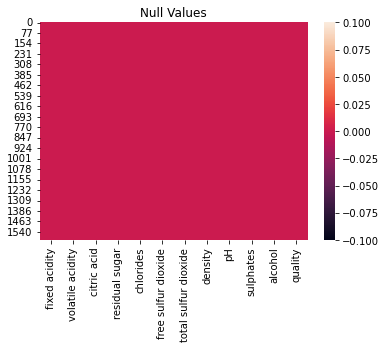

In [10]:
# checking the null value data in Graph
sns.heatmap(df.isnull())
plt.title("Null Values")
plt.show()

Above information confirm that there is no null value, so no need of any treatment for null values

# Visulise the data into Graph

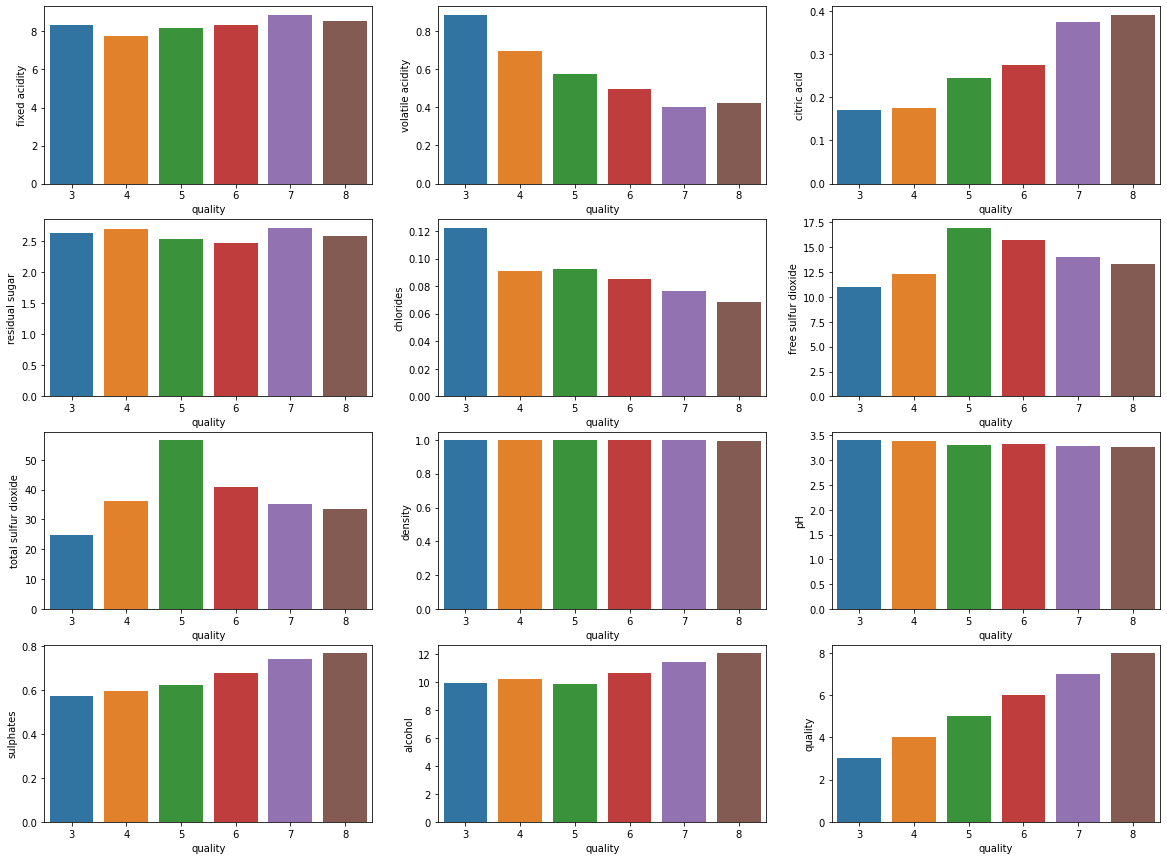

In [11]:
# getting the bar chart for each independent variable vs "Qaulity".
j=1 
fig = plt.figure(figsize = (20,15))
for i in df.columns:
    plt.subplot(4,3,j)
    sns.barplot(x="quality",y=i,data=df,ci=None)
    j=j+1

""" From Above Barcharts we can see individual effect on quality of the product by getting the mean value for each variable by quanlity wise : 

1   fixed acidity         - increase or decrese of level - has very less or no impact on quality
2   volatile acidity      - negative relation to quality, decreasing the level of volatile acidity better the quality
3   citric acid           - has positve relation to quality, increase the level is increase the quality
4   residual sugar        - increase or decrese of level - has very less or no impact on quality
5   chlorides             - negative relation to quality, decreasing the level of volatile acidity better the quality
6   free sulfur dioxide   - increase or decrese of level - has very less or no impact on quality
7   total sulfur dioxide  - less or no impact on quality
8   density               - no impact on quality 
9   pH                    - no impact on quliaty 
10  sulphates             - positive impact , increasing the level increase the quality of product
11  alcohol               - it has very less impact of alcohol between 3 to 5 quality, but in best quality use of alcohol is high.
"""

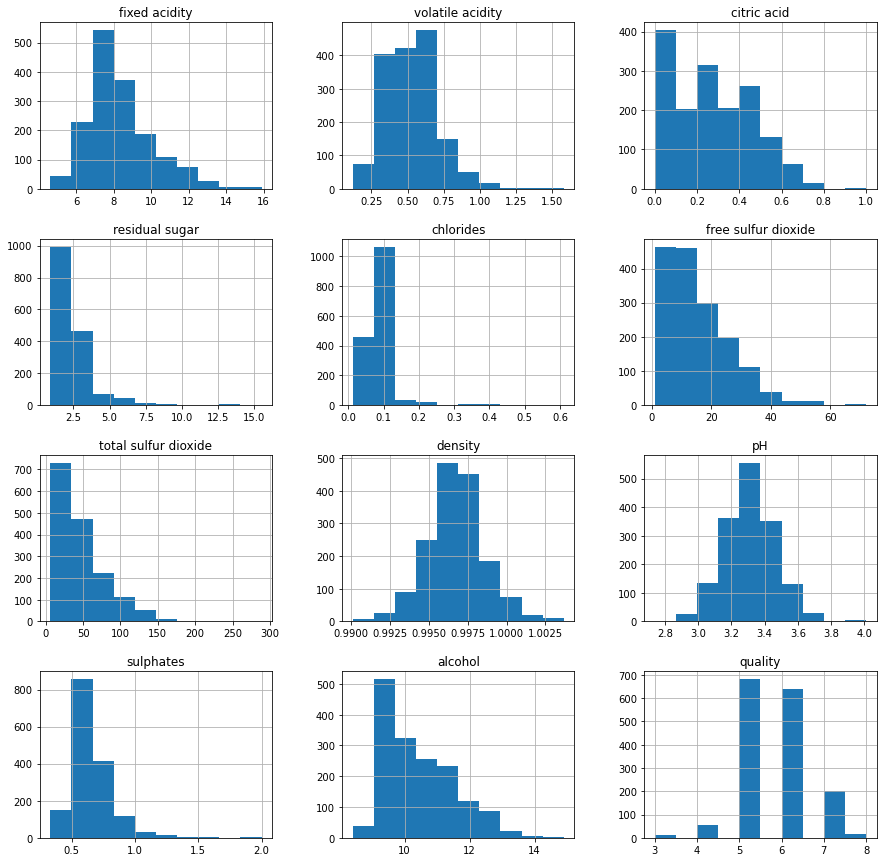

In [12]:
# now let cheak on histogram too. 
df.hist(figsize=(15,15))
plt.show()

above graphs show the distribution of the data. most of the variable has right skewed  apart from density and ph which look bell shaped normal distribution

also,  because most of the data is skewed so that mean there is outliers too.

# Check the correlation between the variable

<AxesSubplot:>

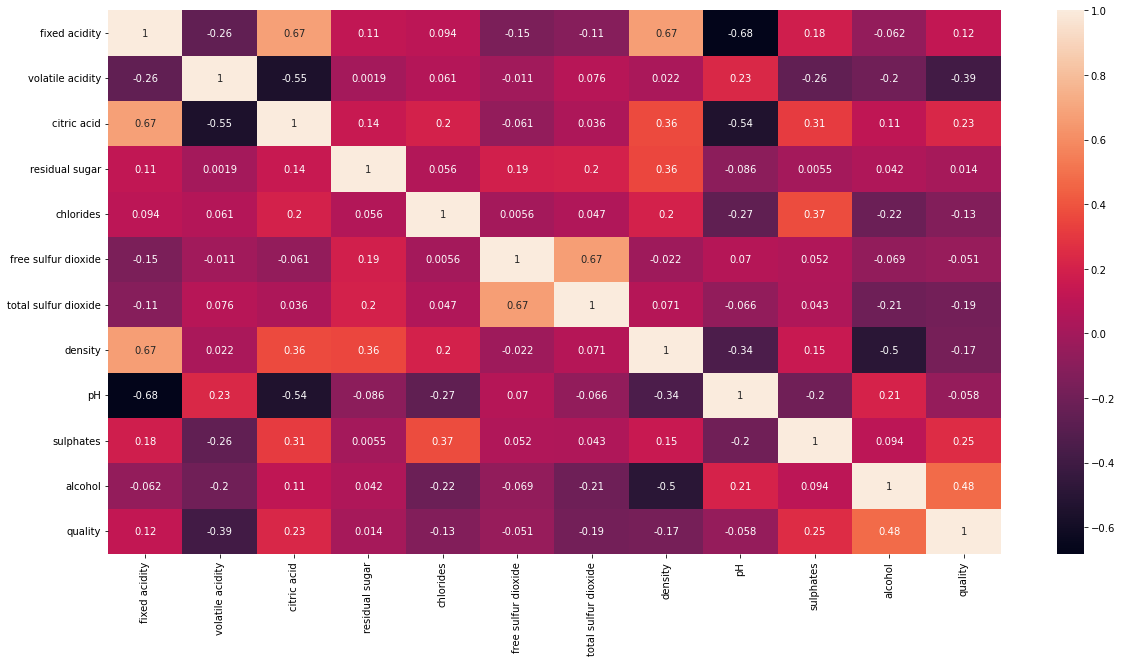

In [13]:
# ploting heatmap for finding relationship between the independent variable
plt.figure(figsize = [20,10])
sns.heatmap(df.corr(),annot=True)

From Above Heatmap Graph:

as per the criteria for >0.60 and <-0.60 we can see that :
    
fixed acidity is highly correlated to citric acid positive 0.62 and highly correlated to density with 0.67
- higly correlated to ph acid -0.68

Volatile acidity is negative moderate correlation to citric acid -0.55

citric acid has negativ correlation -0.54 with ph 

free sulfure dioxide has highly correlated to Total Sulfure dioxide with 0.67 

residual sugar, chlorides, free sulfure dioxide, total sulfure dioxide, density, ph, sulphates no impact on qaulity, so relation to quality are very minimum.

Alcohol has posiive correlation directly to Quality with 0.41 which we can clearly interpret that high quality wine has more alochol level

# Now lets convert the Quality Variable into the categorical value Good and Bad

In [15]:
# get the count of the each quality lable 
df["quality"].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [16]:
# now we create a two categories good and bad wine quality.
interval = (2,6.5,8)
categories =["bad","good"]
df["quality"]=pd.cut(df["quality"],bins=interval,labels=categories)


In [17]:
# checking the dataframe to make sure the above action work.
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,bad
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,bad
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,bad
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,bad
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,bad
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,bad
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,bad
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,bad
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,bad


as we can see the quality column value is now converted into two category (bad, good)

# Label Encoding to give a value for quality column value

In [23]:
# importing libarary for labelencoder
from sklearn.preprocessing import LabelEncoder

In [24]:
LE = LabelEncoder()
df["quality"] = LE.fit_transform(df["quality"])
print(df["quality"])


0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64


Now the quality column cateogry has number 0 for bad and 1 for good.

In [25]:
# count the value of quality column 
df["quality"].value_counts()

0    1382
1     217
Name: quality, dtype: int64

==> value of [0=Bad] and [1=Good] are not equal , so we need to balance the classes

<AxesSubplot:ylabel='quality'>

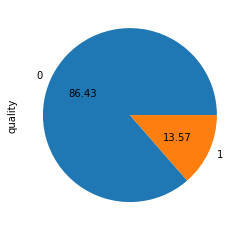

In [26]:
# plot the pie chart for presentation of quality column data 
df["quality"].value_counts().plot(kind="pie",autopct = "%.2F")

Above graph show the quality data in % of share from total data.

#  we will remove the two feature column residual sugar and ph as they have very minimum impact with quality

residual sugar & 
pH 

In [27]:
df= df.drop(["residual sugar","pH"],axis=1)

# checking the dataframe after remvoing the column

In [28]:
print(df.columns)
print(df.head(5))

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'chlorides',
       'free sulfur dioxide', 'total sulfur dioxide', 'density', 'sulphates',
       'alcohol', 'quality'],
      dtype='object')
   fixed acidity  volatile acidity  citric acid  chlorides  \
0            7.4              0.70         0.00      0.076   
1            7.8              0.88         0.00      0.098   
2            7.8              0.76         0.04      0.092   
3           11.2              0.28         0.56      0.075   
4            7.4              0.70         0.00      0.076   

   free sulfur dioxide  total sulfur dioxide  density  sulphates  alcohol  \
0                 11.0                  34.0   0.9978       0.56      9.4   
1                 25.0                  67.0   0.9968       0.68      9.8   
2                 15.0                  54.0   0.9970       0.65      9.8   
3                 17.0                  60.0   0.9980       0.58      9.8   
4                 11.0                  

# Outlier Checking

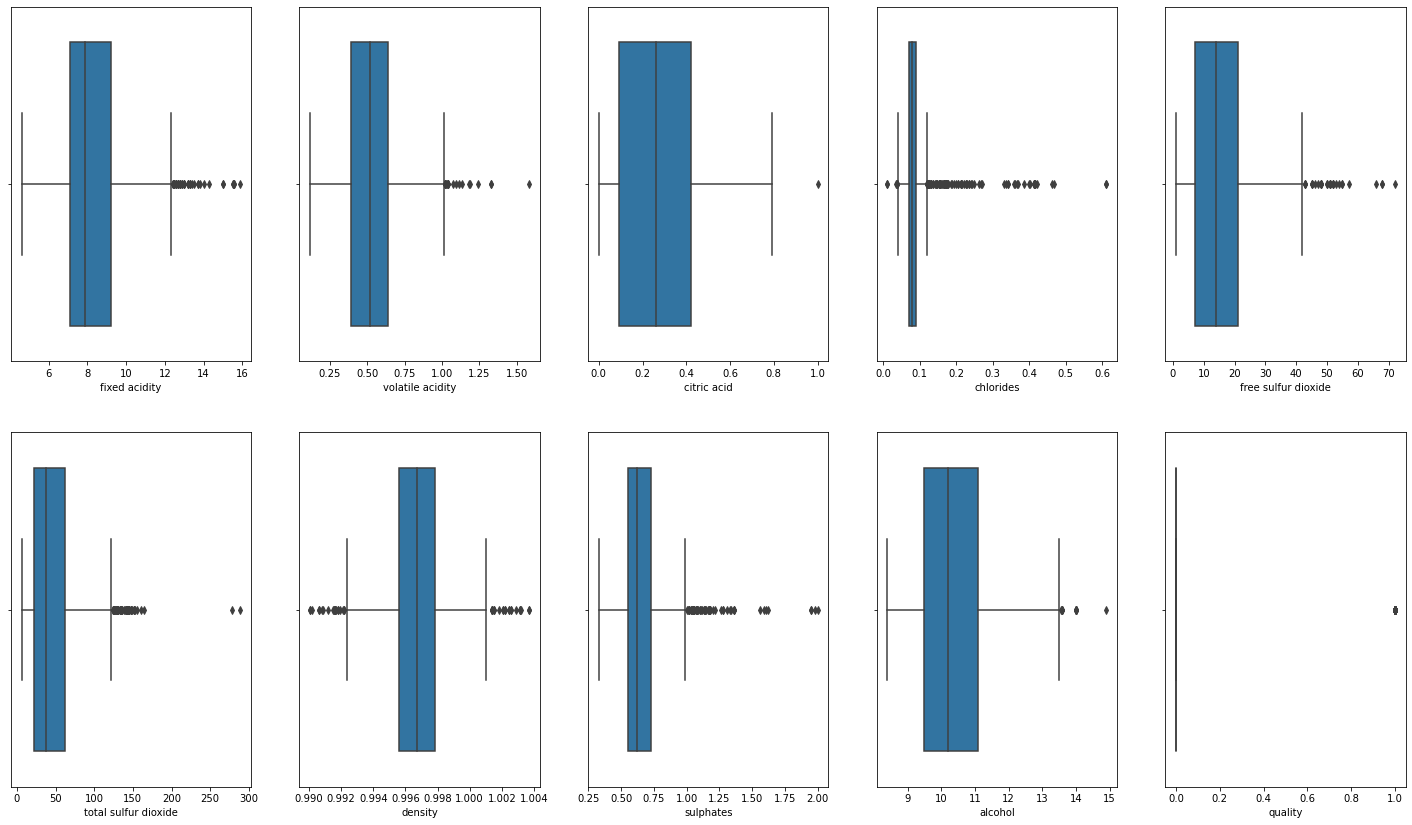

In [34]:
j = 1
fig = plt.figure(figsize=(25,30))
for i in df.columns:
    plt.subplot(4,5,j)
    sns.boxplot(df[i])
    j = j+1

# Removing outlliers - with Z score

In [36]:
x = df.iloc[:,:-1] # independent variable or feature variable
y = df.iloc[:,-1] # dependent or target varible

In [39]:
from scipy.stats import zscore
import numpy as np
z = np.abs(zscore(x))
z.shape
print(z)

      fixed acidity  volatile acidity  citric acid  chlorides  \
0          0.528360          0.961877     1.391472   0.243707   
1          0.298547          1.967442     1.391472   0.223875   
2          0.298547          1.297065     1.186070   0.096353   
3          1.654856          1.384443     1.484154   0.264960   
4          0.528360          0.961877     1.391472   0.243707   
...             ...               ...          ...        ...   
1594       1.217796          0.403229     0.980669   0.053845   
1595       1.390155          0.123905     0.877968   0.541259   
1596       1.160343          0.099554     0.723916   0.243707   
1597       1.390155          0.654620     0.775267   0.264960   
1598       1.332702          1.216849     1.021999   0.434990   

      free sulfur dioxide  total sulfur dioxide   density  sulphates   alcohol  
0                0.466193              0.379133  0.558274   0.579207  0.960246  
1                0.872638              0.624363  0.028261

In [40]:
threshold = 3
print(np.where(z<3))

(array([   0,    0,    0, ..., 1598, 1598, 1598], dtype=int64), array([0, 1, 2, ..., 6, 7, 8], dtype=int64))


In [41]:
x = x[(z<3).all(axis=1)]
x.shape

(1483, 9)

In [50]:
y = y[(z<3).all(axis=1)]
y.shape

(1483,)

In [51]:
df1 = df[(z<3).all(axis=1)]
df1.shape

(1483, 10)

# Percentage of Dataloss

In [52]:
loss_percentage = (1599-1483)/1599*100
print("%.2f" %(loss_percentage))

7.25


# Model without outliers is df and after the removing outliers is df1

In [53]:
# Transforming data to remove skewness, and increase the symmentry of the the distribution of the features:
from sklearn.preprocessing import power_transform
x = power_transform(x,method="yeo-johnson")

In [54]:
x

array([[-0.45108768,  1.04438288, -1.52441858, ...,  0.62373616,
        -0.58415469, -1.10789867],
       [-0.16266466,  1.904138  , -1.52441858, ...,  0.05149056,
         0.46193357, -0.52644196],
       [-0.16266466,  1.34437285, -1.2431941 , ...,  0.16629974,
         0.22975381, -0.52644196],
       ...,
       [-1.39083915, -0.01073703, -0.66087734, ..., -0.56002098,
         0.94132694,  0.73448963],
       [-1.7995497 ,  0.75629996, -0.72242341, ..., -0.71659959,
         0.67743484, -0.03619195],
       [-1.69339583, -1.33928005,  1.07494917, ..., -0.70498977,
         0.30909711,  0.73448963]])

# Scaling 

In [55]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)
x

array([[-0.45108768,  1.04438288, -1.52441858, ...,  0.62373616,
        -0.58415469, -1.10789867],
       [-0.16266466,  1.904138  , -1.52441858, ...,  0.05149056,
         0.46193357, -0.52644196],
       [-0.16266466,  1.34437285, -1.2431941 , ...,  0.16629974,
         0.22975381, -0.52644196],
       ...,
       [-1.39083915, -0.01073703, -0.66087734, ..., -0.56002098,
         0.94132694,  0.73448963],
       [-1.7995497 ,  0.75629996, -0.72242341, ..., -0.71659959,
         0.67743484, -0.03619195],
       [-1.69339583, -1.33928005,  1.07494917, ..., -0.70498977,
         0.30909711,  0.73448963]])

# Oversampling the Data - Balancing it


In [56]:
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x,y = SM.fit_resample(x,y)

In [57]:
y.value_counts()

0    1280
1    1280
Name: quality, dtype: int64

Now the data is balance and ready for modeling

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,accuracy_score

# Splitting the Dataframe 

In [61]:
for i in range(0,1000):
    x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=i,test_size=0.20)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test =lr.predict(x_test)
    if round(accuracy_score(y_train,pred_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
        print("At Random State = ",i, " The Model performs well")
        print("At Random State : = ",i)
        print("Training Accuracy is : - ", accuracy_score(y_train,pred_train)*100)
        print("Testing Accuracy is : - ",accuracy_score(y_test,pred_test)*100)
        print("Difference : - ",(accuracy_score(y_train,pred_train)*100 - accuracy_score(y_test,pred_test)*100))
        print("\n")

At Random State =  99  The Model performs well
At Random State : =  99
Training Accuracy is : -  82.03125
Testing Accuracy is : -  82.03125
Difference : -  0.0


At Random State =  169  The Model performs well
At Random State : =  169
Training Accuracy is : -  82.03125
Testing Accuracy is : -  82.03125
Difference : -  0.0


At Random State =  212  The Model performs well
At Random State : =  212
Training Accuracy is : -  81.8359375
Testing Accuracy is : -  81.8359375
Difference : -  0.0


At Random State =  254  The Model performs well
At Random State : =  254
Training Accuracy is : -  82.2265625
Testing Accuracy is : -  82.2265625
Difference : -  0.0


At Random State =  285  The Model performs well
At Random State : =  285
Training Accuracy is : -  81.8359375
Testing Accuracy is : -  81.8359375
Difference : -  0.0


At Random State =  349  The Model performs well
At Random State : =  349
Training Accuracy is : -  82.177734375
Testing Accuracy is : -  82.2265625
Difference : -  -0.048

At Random State - 254 : Train Accuracy is 82.2265 and Testing Accuracy is : 82.2265 with difference is 0.00

In [62]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=254)

In [63]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.55      0.49      0.52       266
           1       0.51      0.56      0.53       246

    accuracy                           0.53       512
   macro avg       0.53      0.53      0.53       512
weighted avg       0.53      0.53      0.53       512



# Cross Validation scores for logistic regression


In [65]:
pred_lr = lr.predict(x_test)
from sklearn.model_selection import cross_val_score
lss = accuracy_score(y_test,pred_lr)
for j in range(2,10):
    lsscore = cross_val_score(lr,x,y,cv=j)
    lsc = lsscore.mean()
    print("At CV :- ",j)
    print("Cross validation score is : -",lsc*100)
    print("accuracy is :- ", lss*100)
    print("Difference is :-", lsc*100 - lss*100)
    print("\n")

At CV :-  2
Cross validation score is : - 78.86718749999999
accuracy is :-  83.203125
Difference is :- -4.335937500000014


At CV :-  3
Cross validation score is : - 80.19393370324511
accuracy is :-  83.203125
Difference is :- -3.009191296754892


At CV :-  4
Cross validation score is : - 80.703125
accuracy is :-  83.203125
Difference is :- -2.5


At CV :-  5
Cross validation score is : - 80.1171875
accuracy is :-  83.203125
Difference is :- -3.0859375


At CV :-  6
Cross validation score is : - 80.03641154760989
accuracy is :-  83.203125
Difference is :- -3.1667134523901126


At CV :-  7
Cross validation score is : - 80.27204773667832
accuracy is :-  83.203125
Difference is :- -2.931077263321683


At CV :-  8
Cross validation score is : - 80.390625
accuracy is :-  83.203125
Difference is :- -2.8125


At CV :-  9
Cross validation score is : - 80.696263350081
accuracy is :-  83.203125
Difference is :- -2.506861649919003




At CV = 4 we get best score with low difference to accuracy score 

In [67]:
lsscore_selected = cross_val_score(lr,x,y,cv=4).mean()
print("The CV socre is :",lsscore_selected,"\n The Accuracy score is :",lss)

The CV socre is : 0.80703125 
 The Accuracy score is : 0.83203125


# RandomForestClassifier Testing

In [68]:
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier,BaggingClassifier
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier

In [71]:
RFC = RandomForestClassifier()
RFC.fit(x_train,y_train)
predRFC = RFC.predict(x_test)

print(accuracy_score(y_test,predRFC)*100)
print(confusion_matrix(y_test,predRFC))
print(classification_report(y_test,predRFC))

94.3359375
[[242  24]
 [  5 241]]
              precision    recall  f1-score   support

           0       0.98      0.91      0.94       266
           1       0.91      0.98      0.94       246

    accuracy                           0.94       512
   macro avg       0.94      0.94      0.94       512
weighted avg       0.95      0.94      0.94       512



from above observation - with Random Forest we are getting high accuracy, and confusion matrix has high number for True Positive and True Negative score

In [73]:
score = cross_val_score(RFC,x,y,cv=4)
print(score)
print("Difference between Accuracy and cvs : ",accuracy_score(y_test,predRFC) - score.mean())

[0.9484375 0.934375  0.846875  0.903125 ]
Difference between Accuracy and cvs :  0.03515625


# SVC Model Testing

In [75]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train,y_train)
predsvc = svc.predict(x_test)

print(accuracy_score(y_test,predsvc)*100)
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

87.109375
[[215  51]
 [ 15 231]]
              precision    recall  f1-score   support

           0       0.93      0.81      0.87       266
           1       0.82      0.94      0.88       246

    accuracy                           0.87       512
   macro avg       0.88      0.87      0.87       512
weighted avg       0.88      0.87      0.87       512



In [78]:
# checking svc score with cross val score
score = cross_val_score(svc,x,y,cv=4)
print(score)
print(score.mean())
print("difference between Accuracy and CVS :",accuracy_score(y_test,predsvc) - score.mean())

[0.90625   0.875     0.7859375 0.8484375]
0.8539062500000001
difference between Accuracy and CVS : 0.01718749999999991


# Checking accuray with Gradient Boosting Classifier

In [80]:
GB = GradientBoostingClassifier()
GB.fit(x_train,y_train)
predGB = GB.predict(x_test)
print(accuracy_score(y_test,predGB))
print(confusion_matrix(y_test,predGB))
print(classification_report(y_test,predGB))

0.8984375
[[232  34]
 [ 18 228]]
              precision    recall  f1-score   support

           0       0.93      0.87      0.90       266
           1       0.87      0.93      0.90       246

    accuracy                           0.90       512
   macro avg       0.90      0.90      0.90       512
weighted avg       0.90      0.90      0.90       512



In [81]:
# cross checking the score with cross val score
score = cross_val_score(GB,x,y,cv=4)
print(score)
print(score.mean())
print("Difference Between Accuracy and CVS",accuracy_score(y_test,predGB)-score.mean())

[0.8984375 0.9       0.821875  0.8890625]
0.87734375
Difference Between Accuracy and CVS 0.021093750000000022


# Extra Tree Classifier Model 

In [82]:
ET = ExtraTreesClassifier()
ET.fit(x_train,y_train)
predET = ET.predict(x_test)
print(accuracy_score(y_test,predET))
print(confusion_matrix(y_test,predET))
print(classification_report(y_test,predET))

0.96484375
[[248  18]
 [  0 246]]
              precision    recall  f1-score   support

           0       1.00      0.93      0.96       266
           1       0.93      1.00      0.96       246

    accuracy                           0.96       512
   macro avg       0.97      0.97      0.96       512
weighted avg       0.97      0.96      0.96       512



In [83]:
#checkig the ET score against Cross val Score
score= cross_val_score(ET,x,y,cv=4)
print(score)
print(score.mean())
print("Difference between ",accuracy_score(y_test,predET)-score.mean())

[0.9546875 0.9328125 0.8578125 0.9234375]
0.9171875
Difference between  0.047656249999999956


# Hyper parameter Tuning to get the best parameter for model

In [84]:
from sklearn.model_selection import GridSearchCV

parameters = {"criterion":["gini","entropy"],
             "random_state":[10,50,1000],
             "max_depth":[0,10,20],
             "n_jobs":[-2,-1,1],
             "n_estimators":[50,100,200,300]}
GCV = GridSearchCV(ExtraTreesClassifier(),parameters,cv=4)

In [85]:
GCV.fit(x_train,y_train)

exception calling callback for <Future at 0x255a6396280 state=finished raised ValueError>
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\anaconda3\lib\site-packages\joblib\externals\loky\_base.py", line 26, in _invoke_callbacks
    callback(self)
  File "C:\Users\user\anaconda3\anaconda3\lib\site-packages\joblib\parallel.py", line 385, in __call__
    self.parallel.dispatch_next()
  File "C:\Users\user\anaconda3\anaconda3\lib\site-packages\joblib\parallel.py", line 834, in dispatch_next
    if not self.dispatch_one_batch(self._original_iterator):
  File "C:\Users\user\anaconda3\anaconda3\lib\site-packages\joblib\parallel.py", line 901, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\user\anaconda3\anaconda3\lib\site-packages\joblib\parallel.py", line 819, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "C:\Users\user\anaconda3\anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 556, in apply_async
    future =

GridSearchCV(cv=4, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [0, 10, 20],
                         'n_estimators': [50, 100, 200, 300],
                         'n_jobs': [-2, -1, 1],
                         'random_state': [10, 50, 1000]})

In [86]:
GCV.best_params_

{'criterion': 'gini',
 'max_depth': 20,
 'n_estimators': 100,
 'n_jobs': -2,
 'random_state': 1000}

In [87]:
Final_model= ExtraTreesClassifier(criterion = "gini",max_depth=20,n_estimators=100,n_jobs=-2,random_state=1000)
Final_model.fit(x_train,y_train)
predFinal = Final_model.predict(x_test)
acc = accuracy_score(y_test,predFinal)
print(acc*100)

95.3125


#  AUC ROC Curve

ValueError: 'Lower Right' is not a valid value for loc; supported values are 'best', 'upper right', 'upper left', 'lower left', 'lower right', 'right', 'center left', 'center right', 'lower center', 'upper center', 'center'

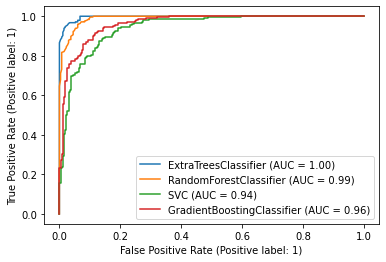

In [89]:
from sklearn import datasets
from sklearn import metrics
from sklearn import model_selection
from sklearn.metrics import plot_roc_curve

disp = plot_roc_curve(ET,x_test,y_test)
plot_roc_curve(RFC,x_test,y_test,ax=disp.ax_)
plot_roc_curve(svc,x_test,y_test,ax=disp.ax_)
plot_roc_curve(GB,x_test,y_test,ax=disp.ax_)

plt.legend(prop={"size":11},loc="Lower Right")
plt.show()

# Saving the Model

In [90]:
import pickle
file = "Wine_Quality.pkl"
save = pickle.dump(Final_model,open(file,"wb"))

# End of WineQuality Project